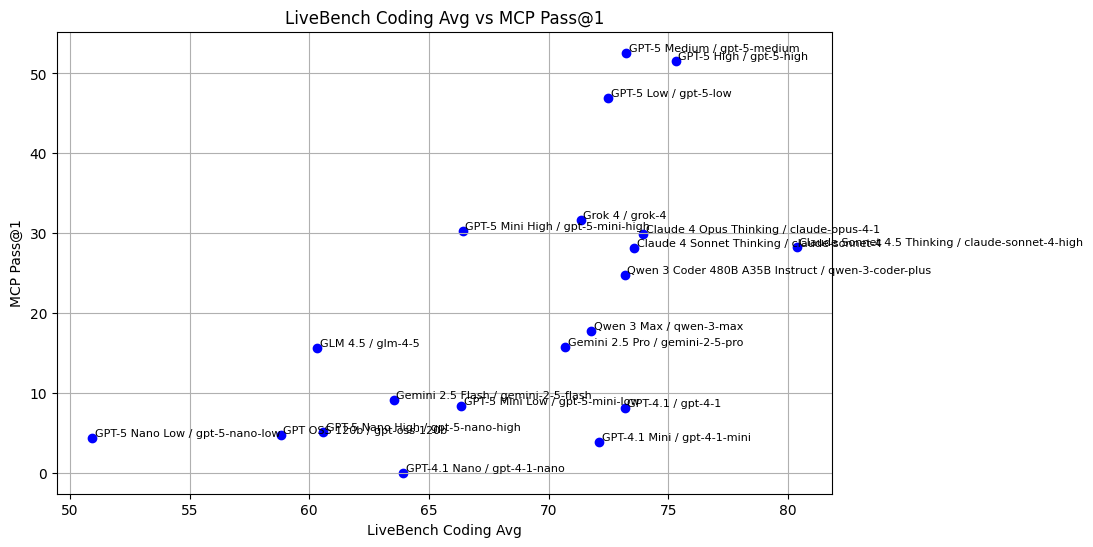

(np.float64(0.6027187378066008),
 np.float64(0.6438511173637327),
                          live_model   live_org  coding_avg  \
 0                        GPT-5 High     OpenAI       75.31   
 1                      GPT-5 Medium     OpenAI       73.25   
 2                         GPT-5 Low     OpenAI       72.49   
 3                   GPT-5 Mini High     OpenAI       66.41   
 4                            Grok 4        xAI       71.34   
 5                    Gemini 2.5 Pro     Google       70.70   
 6                        Qwen 3 Max    Alibaba       71.78   
 7                  Gemini 2.5 Flash     Google       63.53   
 8                    GPT-5 Mini Low     OpenAI       66.35   
 9                           GLM 4.5       Z.AI       60.33   
 10  Qwen 3 Coder 480B A35B Instruct    Alibaba       73.19   
 11                  GPT-5 Nano High     OpenAI       60.59   
 12                          GPT-4.1     OpenAI       73.19   
 13                     GPT OSS 120b     OpenAI     

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# LiveBench data with dates when available
livebench_data = [
    ("GPT-5 High", "OpenAI", 75.31),
    ("GPT-5 Medium", "OpenAI", 73.25),
    ("GPT-5 Low", "OpenAI", 72.49),
    ("GPT-5 Mini High", "OpenAI", 66.41),
    ("Grok 4", "xAI", 71.34),
    ("Gemini 2.5 Pro (Max Thinking)", "Google", 73.90),
    ("Gemini 2.5 Pro", "Google", 70.70),
    ("Qwen 3 Max", "Alibaba", 71.78),
    ("Gemini 2.5 Flash", "Google", 63.53),
    ("GPT-5 Mini Low", "OpenAI", 66.35),
    ("GLM 4.5", "Z.AI", 60.33),
    ("Qwen 3 Coder 480B A35B Instruct", "Alibaba", 73.19),
    ("GPT-5 Nano High", "OpenAI", 60.59),
    ("GPT-4.1", "OpenAI", 73.19),
    ("GPT OSS 120b", "OpenAI", 58.80),
    ("GPT-4.1 Mini", "OpenAI", 72.11),
    ("GPT-5 Nano Low", "OpenAI", 50.93),
    ("GPT-4.1 Nano", "OpenAI", 63.92),
    ("Claude 4 Opus Thinking", "Anthropic", 73.96),
    ("Claude 4 Sonnet Thinking", "Anthropic", 73.58),
    ("Claude Sonnet 4.5 Thinking", "Anthropic", 80.36),
    ("Claude 3.7 Sonnet Thinking", "Anthropic", 73.19),
]

# MCP leaderboard with dates
mcp_data = [
    ("gpt-5-medium", "gpt-5-2025-08-07", 52.6),
    ("gpt-5-high", "gpt-5-2025-08-07", 51.6),
    ("gpt-5-low", "gpt-5-2025-08-07", 46.9),
    ("grok-4", "grok-4-0709", 31.7),
    ("gpt-5-mini-high", "gpt-5-mini-2025-08-07", 30.3),
    ("claude-opus-4-1", "claude-opus-4-1-20250805", 29.9),
    ("claude-sonnet-4-high", "claude-sonnet-4-20250514", 28.3),
    ("claude-sonnet-4", "claude-sonnet-4-20250514", 28.1),
    ("claude-sonnet-4-low", "claude-sonnet-4-20250514", 27.4),
    ("gpt-5-mini-medium", "gpt-5-mini-2025-08-07", 27.4),
    ("o3", "o3-2025-04-16", 25.4),
    ("qwen-3-coder-plus", "qwen3-coder-480b-a35b-instruct", 24.8),
    ("kimi-k2-0905", "kimi-k2-0905-preview", 21.9),
    ("grok-code-fast-1", "grok-code-fast-1", 20.5),
    ("kimi-k2-0711", "kimi-k2-0711-preview", 19.1),
    ("qwen-3-max", "qwen3-max-preview", 17.7),
    ("o4-mini", "o4-mini-2025-04-16", 17.3),
    ("deepseek-chat", "deepseek-v3.1-non-think", 16.7),
    ("gemini-2-5-pro", "gemini-2.5-pro", 15.8),
    ("glm-4-5", "glm-4.5", 15.6),
    ("gemini-2-5-flash", "gemini-2.5-flash", 9.1),
    ("gpt-5-mini-low", "gpt-5-mini-2025-08-07", 8.3),
    ("gpt-4-1", "gpt-4.1-2025-04-14", 8.1),
    ("gpt-5-nano-medium", "gpt-5-nano-2025-08-07", 6.3),
    ("gpt-5-nano-high", "gpt-5-nano-2025-08-07", 5.1),
    ("gpt-oss-120b", "gpt-oss-120b", 4.7),
    ("gpt-5-nano-low", "gpt-5-nano-2025-08-07", 4.3),
    ("gpt-4-1-mini", "gpt-4.1-mini-2025-04-14", 3.9),
    ("gpt-4-1-nano", "gpt-4.1-nano-2025-04-14", 0.0),
]

# Manual mapping based on normalized names
pairs = [
    ("GPT-5 High", "gpt-5-high"),
    ("GPT-5 Medium", "gpt-5-medium"),
    ("GPT-5 Low", "gpt-5-low"),
    ("GPT-5 Mini High", "gpt-5-mini-high"),
    ("Grok 4", "grok-4"),
    ("Gemini 2.5 Pro", "gemini-2-5-pro"),
    ("Qwen 3 Max", "qwen-3-max"),
    ("Gemini 2.5 Flash", "gemini-2-5-flash"),
    ("GPT-5 Mini Low", "gpt-5-mini-low"),
    ("GLM 4.5", "glm-4-5"),
    ("Qwen 3 Coder 480B A35B Instruct", "qwen-3-coder-plus"),
    ("GPT-5 Nano High", "gpt-5-nano-high"),
    ("GPT-4.1", "gpt-4-1"),
    ("GPT OSS 120b", "gpt-oss-120b"),
    ("GPT-4.1 Mini", "gpt-4-1-mini"),
    ("GPT-5 Nano Low", "gpt-5-nano-low"),
    ("GPT-4.1 Nano", "gpt-4-1-nano"),
    ("Claude 4 Opus Thinking", "claude-opus-4-1"),
    ("Claude 4 Sonnet Thinking", "claude-sonnet-4"),
    ("Claude Sonnet 4.5 Thinking", "claude-sonnet-4-high"),
]

# Construct merged dataframe
records = []
for live, mcp in pairs:
    live_row = next((l for l in livebench_data if l[0] == live), None)
    mcp_row = next((m for m in mcp_data if m[0] == mcp), None)
    if live_row and mcp_row:
        records.append((live_row[0], live_row[1], live_row[2], mcp_row[0], mcp_row[1], mcp_row[2]))

df = pd.DataFrame(records, columns=["live_model", "live_org", "coding_avg", "mcp_model", "mcp_date", "pass1"])

# Correlations
pearson_corr, _ = pearsonr(df["coding_avg"], df["pass1"])
spearman_corr, _ = spearmanr(df["coding_avg"], df["pass1"])

# Plot
plt.figure(figsize=(10,6))
plt.scatter(df["coding_avg"], df["pass1"], color="blue")
for _, row in df.iterrows():
    plt.text(row["coding_avg"]+0.1, row["pass1"]+0.2, f"{row['live_model']} / {row['mcp_model']}", fontsize=8)
plt.xlabel("LiveBench Coding Avg")
plt.ylabel("MCP Pass@1")
plt.title("LiveBench Coding Avg vs MCP Pass@1")
plt.grid(True)
plt.show()

pearson_corr, spearman_corr, df


| LiveBench Model               | Org       | Coding Avg | MCP Model            | MCP Date                       | Pass@1 |
| ----------------------------- | --------- | ---------- | -------------------- | ------------------------------ | ------ |
| GPT-5 High                    | OpenAI    | 75.31      | gpt-5-high           | gpt-5-2025-08-07               | 51.6   |
| GPT-5 Medium                  | OpenAI    | 73.25      | gpt-5-medium         | gpt-5-2025-08-07               | 52.6   |
| GPT-5 Low                     | OpenAI    | 72.49      | gpt-5-low            | gpt-5-2025-08-07               | 46.9   |
| GPT-5 Mini High               | OpenAI    | 66.41      | gpt-5-mini-high      | gpt-5-mini-2025-08-07          | 30.3   |
| Grok 4                        | xAI       | 71.34      | grok-4               | grok-4-0709                    | 31.7   |
| Gemini 2.5 Pro (Max Thinking) | Google    | 73.90      | gemini-2-5-pro       | gemini-2.5-pro                 | 15.8   |
| Gemini 2.5 Pro                | Google    | 70.70      | gemini-2-5-pro       | gemini-2.5-pro                 | 15.8   |
| Qwen 3 Max                    | Alibaba   | 71.78      | qwen-3-max           | qwen3-max-preview              | 17.7   |
| Gemini 2.5 Flash              | Google    | 63.53      | gemini-2-5-flash     | gemini-2.5-flash               | 9.1    |
| GPT-5 Mini Low                | OpenAI    | 66.35      | gpt-5-mini-low       | gpt-5-mini-2025-08-07          | 8.3    |
| GLM 4.5                       | Z.AI      | 60.33      | glm-4-5              | glm-4.5                        | 15.6   |
| Qwen 3 Coder 480B A35B Instr. | Alibaba   | 73.19      | qwen-3-coder-plus    | qwen3-coder-480b-a35b-instruct | 24.8   |
| GPT-5 Nano High               | OpenAI    | 60.59      | gpt-5-nano-high      | gpt-5-nano-2025-08-07          | 5.1    |
| GPT-4.1                       | OpenAI    | 73.19      | gpt-4-1              | gpt-4.1-2025-04-14             | 8.1    |
| GPT OSS 120b                  | OpenAI    | 58.80      | gpt-oss-120b         | gpt-oss-120b                   | 4.7    |
| GPT-4.1 Mini                  | OpenAI    | 72.11      | gpt-4-1-mini         | gpt-4.1-mini-2025-04-14        | 3.9    |
| GPT-5 Nano Low                | OpenAI    | 50.93      | gpt-5-nano-low       | gpt-5-nano-2025-08-07          | 4.3    |
| GPT-4.1 Nano                  | OpenAI    | 63.92      | gpt-4-1-nano         | gpt-4-1-nano-2025-04-14        | 0.0    |
| Claude 4 Opus Thinking        | Anthropic | 73.96      | claude-opus-4-1      | claude-opus-4-1-20250805       | 29.9   |
| Claude 4 Sonnet Thinking      | Anthropic | 73.58      | claude-sonnet-4      | claude-sonnet-4-20250514       | 28.1   |
| Claude Sonnet 4.5 Thinking    | Anthropic | 80.36      | claude-sonnet-4-high | claude-sonnet-4-20250514       | 28.3   |
| Claude 3.7 Sonnet Thinking    | Anthropic | 73.19      | claude-sonnet-4-low  | claude-sonnet-4-20250514       | 27.4   |


Pearson correlation: 0.8646541738658179 p= 0.0002837301432158671
Spearman correlation: 0.9300699300699302 p= 1.170222792865967e-05


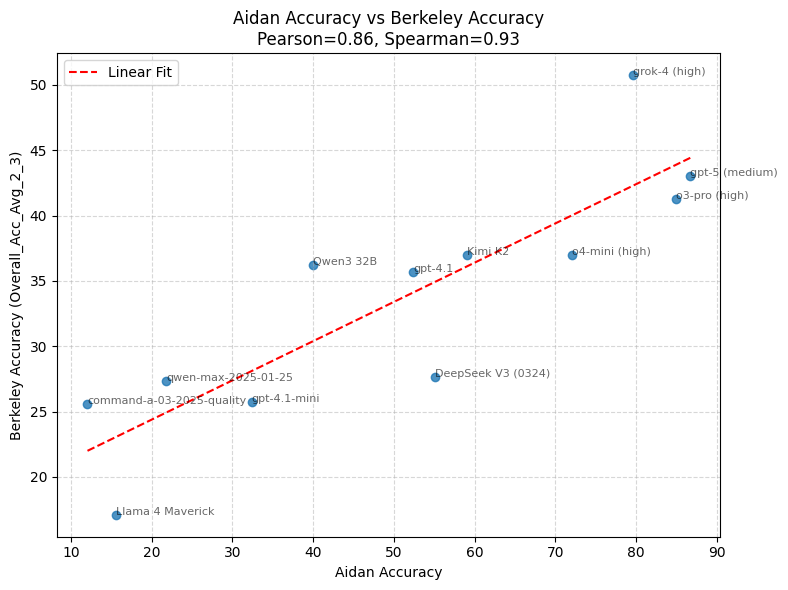

In [25]:
aiden2berkeley = {
    # GPT-5 core families
    # "gpt-5 (high)": "GPT-5-2025-08-07 (FC)",
    "gpt-5 (medium)": "GPT-5-2025-08-07 (FC)",
    # "gpt-5 (low)": "GPT-5-2025-08-07 (FC)",
    # "gpt-5-mini-high": "GPT-5-mini-2025-08-07 (FC)",
    "gpt-5-mini-medium": "GPT-5-mini-2025-08-07 (FC)",
    # "gpt-5-mini-low": "GPT-5-mini-2025-08-07 (FC)",
    "gpt-5-nano-medium": "GPT-5-nano-2025-08-07 (FC)",
    # "gpt-5-nano-high": "GPT-5-nano-2025-08-07 (FC)",
    # "gpt-5-nano-low": "GPT-5-nano-2025-08-07 (FC)",

    # O-series
    "o3-pro (high)": "o3-2025-04-16 (FC)",
    "o4-mini (high)": "o4-mini-2025-04-16 (FC)",

    # Claude
    "claude-opus-4-20250514": "Claude-Opus-4-1-20250805 (FC)",
    "claude-sonnet-4-20250514": "Claude-Sonnet-4-20250514 (FC)",

    # DeepSeek
    "DeepSeek V3 (0324)": "DeepSeek-V3-0324 (FC)",

    # Grok
    "grok-4 (high)": "Grok-4-0709 (FC)",

    # Gemini
    "gemini-2.5-pro-preview": "Gemini-2.5-Pro (FC)",
    "gemini-2.5-flash-preview": "Gemini-2.5-Flash (FC)",

    # Qwen
    "Qwen3 32B": "Qwen3-32B (FC)",
    "Qwen3 235B A22B Instruct": "Qwen3-235B-A22B-Instruct-2507 (FC)",
    "qwen-max-2025-01-25": "Qwen3-30B-A3B-Instruct-2507 (FC)",

    # Kimi
    "Kimi K2": "Moonshotai-Kimi-K2-Instruct (FC)",

    # GLM
    "GLM-4.5": "GLM-4.5 (FC)",
    "GLM-4.5-Air": "GLM-4.5-Air (FC)",

    # Llama
    "Llama 4 Maverick": "Llama-4-Maverick-17B-128E-Instruct-FP8 (FC)",

    # GPT-4 family
    "gpt-4.1": "GPT-4o-2024-11-20 (FC)",
    "gpt-4.1-mini": "GPT-4o-mini-2024-07-18 (FC)",

    # Command
    "command-a-03-2025-quality": "Command A (FC)",
}

# === Load data ===
# Replace with paths to your CSVs
aiden_csv = "cleaned_data/aiden.csv"       # has columns: Model, Coding-Average
berkeley_csv = "cleaned_data/berkeley.csv" # has columns: Model, Pass@1 (avg ± std), etc.

aidan = pd.read_csv(aiden_csv)
berkeley = pd.read_csv(berkeley_csv)

# Norma
# Map Aidan model names -> Berkeley equivalents
aidan["FC_Model"] = aidan["Model"].map(aiden2berkeley)

# Merge on mapped names
merged = aidan.merge(
    berkeley, left_on="FC_Model", right_on="Model", how="inner"
)

# Correlation
x = merged["Accuracy"]
y = merged["Overall_Acc_Avg_2_3"]

pearson_corr, p_p = pearsonr(x, y)
spearman_corr, p_s = spearmanr(x, y)

print("Pearson correlation:", pearson_corr, "p=", p_p)
print("Spearman correlation:", spearman_corr, "p=", p_s)

# === Plot ===
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.8)

for _, row in merged.iterrows():
    plt.text(row["Accuracy"], row["Overall_Acc_Avg_2_3"], row["Model_x"], fontsize=8, alpha=0.6)

plt.title(f"Aidan Accuracy vs Berkeley Accuracy\nPearson={pearson_corr:.2f}, Spearman={spearman_corr:.2f}")
plt.xlabel("Aidan Accuracy")
plt.ylabel("Berkeley Accuracy (Overall_Acc_Avg_2_3)")
plt.grid(True, linestyle="--", alpha=0.5)

# Regression line
import numpy as np
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red", linestyle="--", label="Linear Fit")
plt.legend()

plt.tight_layout()
plt.show()

Pearson correlation: 0.25882087286575345 p= 0.25726576233149157
Spearman correlation: 0.3818181818181818 p= 0.0876405357845381


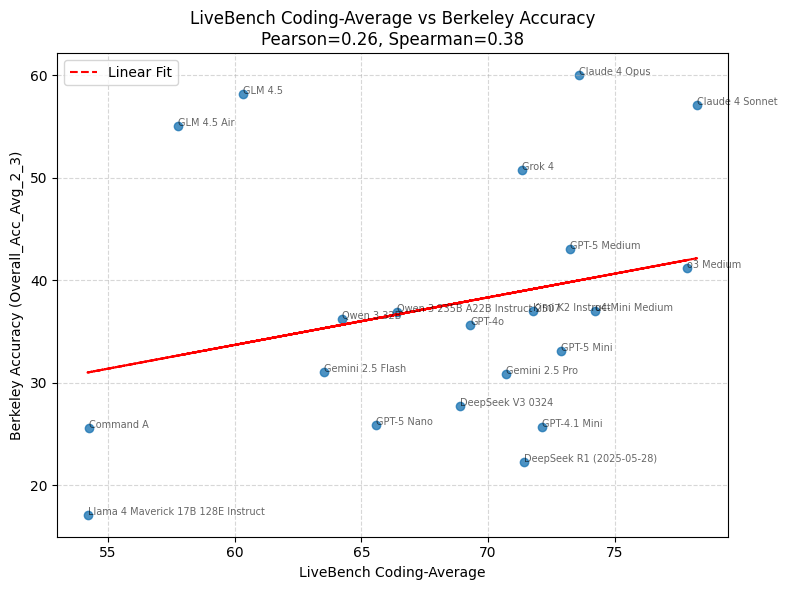

In [22]:
livebench2berkeley = {
    # GPT-5 family
    # "GPT-5 High": "GPT-5-2025-08-07 (FC)",
    "GPT-5 Medium": "GPT-5-2025-08-07 (FC)",
    # "GPT-5 Low": "GPT-5-2025-08-07 (FC)",
    # "GPT-5 Mini High": "GPT-5-mini-2025-08-07 (FC)",
    "GPT-5 Mini": "GPT-5-mini-2025-08-07 (FC)",
    # "GPT-5 Mini Low": "GPT-5-nano-2025-08-07 (FC)",
    "GPT-5 Nano": "GPT-5-nano-2025-08-07 (FC)",
    # "GPT-5 Nano High": "GPT-5-nano-2025-08-07 (FC)",
    # "GPT-5 Nano Low": "GPT-5-nano-2025-08-07 (FC)",

    # O3 / O4 family
    # "o3 Pro High": "o3-2025-04-16 (FC)",
    # "o3 High": "o3-2025-04-16 (FC)",
    "o3 Medium": "o3-2025-04-16 (FC)",
    # "o4-Mini High": "o4-mini-2025-04-16 (FC)",
    "o4-Mini Medium": "o4-mini-2025-04-16 (FC)",

    # Claude family
    # "Claude 4.1 Opus Thinking": "Claude-Opus-4-1-20250805 (FC)",
    "Claude 4 Opus": "Claude-Opus-4-1-20250805 (FC)",
    "Claude 4 Sonnet": "Claude-Sonnet-4-20250514 (FC)",
    # "Claude Sonnet 4.5": "Claude-Sonnet-4-20250514 (FC)",

    # Grok
    "Grok 4": "Grok-4-0709 (FC)",

    # Gemini
    "Gemini 2.5 Pro": "Gemini-2.5-Pro (FC)",
    "Gemini 2.5 Flash": "Gemini-2.5-Flash (FC)",

    # Qwen family
    "Qwen 3 235B A22B Instruct 2507": "Qwen3-235B-A22B-Instruct-2507 (FC)",
    # "Qwen 3 Max": "Qwen3-30B-A3B-Instruct-2507 (FC)",
    "Qwen 3 32B": "Qwen3-32B (FC)",

    # DeepSeek
    "DeepSeek V3 0324": "DeepSeek-V3-0324 (FC)",
    "DeepSeek R1 (2025-05-28)": "DeepSeek-R1-0528 (FC)",

    # GLM
    "GLM 4.5": "GLM-4.5 (FC)",
    "GLM 4.5 Air": "GLM-4.5-Air (FC)",

    # Kimi
    "Kimi K2 Instruct": "Moonshotai-Kimi-K2-Instruct (FC)",

    # Llama
    "Llama 4 Maverick 17B 128E Instruct": "Llama-4-Maverick-17B-128E-Instruct-FP8 (FC)",

    # GPT-4 family
    "GPT-4.1 Mini": "GPT-4o-mini-2024-07-18 (FC)",
    # "ChatGPT-4o": "GPT-4o-2024-11-20 (FC)",
    "GPT-4o": "GPT-4o-2024-11-20 (FC)",

    # Others
    "Command A": "Command A (FC)",
}


livebench = pd.read_csv("cleaned_data/livebench.csv")   # columns: Model,Coding-Average
berkeley = pd.read_csv("cleaned_data/berkeley.csv")     # columns: Model,Overall_Acc_Avg_2_3

# Map LiveBench model names -> Berkeley equivalents
livebench["FC_Model"] = livebench["Model"].map(livebench2berkeley)

# Merge
merged = livebench.merge(
    berkeley, left_on="FC_Model", right_on="Model", how="inner"
)

# Correlation
x = merged["Coding-Average"]
y = merged["Overall_Acc_Avg_2_3"]

pearson_corr, p_p = pearsonr(x, y)
spearman_corr, p_s = spearmanr(x, y)

print("Pearson correlation:", pearson_corr, "p=", p_p)
print("Spearman correlation:", spearman_corr, "p=", p_s)

# === Plot ===
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.8)

for _, row in merged.iterrows():
    plt.text(row["Coding-Average"], row["Overall_Acc_Avg_2_3"], row["Model_x"], fontsize=7, alpha=0.6)

plt.title(f"LiveBench Coding-Average vs Berkeley Accuracy\nPearson={pearson_corr:.2f}, Spearman={spearman_corr:.2f}")
plt.xlabel("LiveBench Coding-Average")
plt.ylabel("Berkeley Accuracy (Overall_Acc_Avg_2_3)")
plt.grid(True, linestyle="--", alpha=0.5)

# Regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red", linestyle="--", label="Linear Fit")
plt.legend()

plt.tight_layout()
plt.show()

Pearson correlation: 0.5787162442775811 p= 0.000807344636964568
Spearman correlation: 0.6107587431610426 p= 0.0003375581608849428


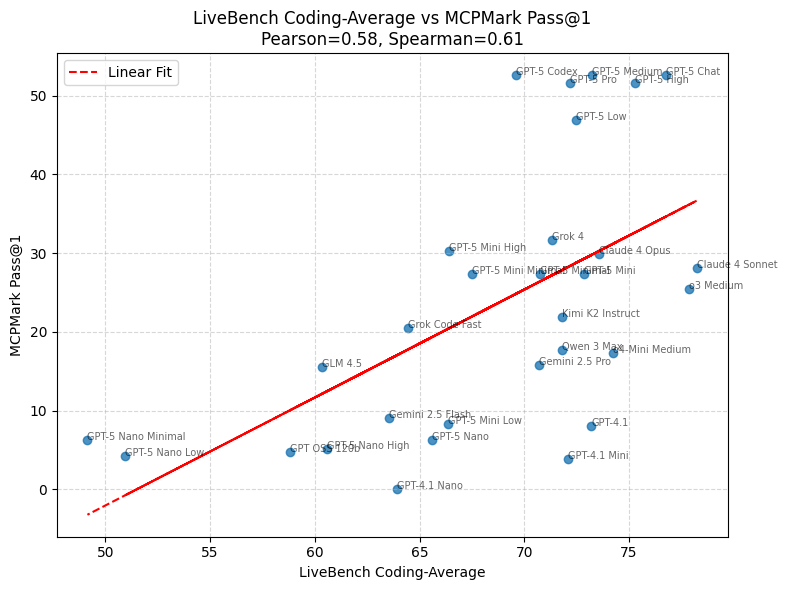

In [26]:
livebench2mcpmark = {
    # GPT-5 family
    "GPT-5 High": "gpt-5-high",
    "GPT-5 Medium": "gpt-5-medium",
    "GPT-5 Low": "gpt-5-low",
    "GPT-5 Mini High": "gpt-5-mini-high",
    "GPT-5 Mini": "gpt-5-mini-medium",   # closest match
    "GPT-5 Mini Low": "gpt-5-mini-low",
    "GPT-5 Nano High": "gpt-5-nano-high",
    "GPT-5 Nano Low": "gpt-5-nano-low",
    "GPT-5 Nano": "gpt-5-nano-medium",   # middle config
    "GPT-5 Nano Minimal": "gpt-5-nano-medium",  # fallback to medium
    "GPT-5 Mini Minimal": "gpt-5-mini-medium",
    "GPT-5 Minimal": "gpt-5-mini-medium",
    "GPT-5 Codex": "gpt-5-medium",  # not explicit in table, align with mid-tier GPT-5
    "GPT-5 Chat": "gpt-5-medium",   # closest generic chat version
    "GPT-5 Pro": "gpt-5-high",      # table only has high/medium/low

    # GPT-4.1 family
    "GPT-4.1": "gpt-4-1",
    "GPT-4.1 Mini": "gpt-4-1-mini",
    "GPT-4.1 Nano": "gpt-4-1-nano",

    # Claude family
    "Claude 4 Opus": "claude-opus-4-1",
    "Claude 4 Sonnet": "claude-sonnet-4",
    "Claude Sonnet 4.5": "claude-sonnet-4-high",
    "Claude Sonnet 4.5 Thinking": "claude-sonnet-4-high",
   # fallback

    # o-series

    "o3 Medium": "o3",
    "o4-Mini Medium": "o4-mini",

    # Grok family
    "Grok 4": "grok-4",
    "Grok Code Fast": "grok-code-fast-1",

    # Gemini family
    "Gemini 2.5 Pro": "gemini-2-5-pro",
    "Gemini 2.5 Flash": "gemini-2-5-flash",

    # Qwen family
    "Qwen 3 Coder 480B A35B Instruct": "qwen-3-coder-plus",
    "Qwen 3 Max": "qwen-3-max",
  

    # DeepSeek family


    # GLM family
    "GLM 4.5": "glm-4-5",

    # Kimi
    "Kimi K2 Instruct": "kimi-k2-0905",


    "GPT OSS 120b": "gpt-oss-120b",
}
#aiden2mcp

# === Load data ===
livebench = pd.read_csv("cleaned_data/livebench.csv")   # Model,Coding-Average
mcp = pd.read_csv("cleaned_data/mcpmark.csv")           # Model,Version,Pass@1

# Map LiveBench model names to MCPMark equivalents
livebench["MCP_Model"] = livebench["Model"].map(livebench2mcpmark)

# Merge
merged = livebench.merge(
    mcp, left_on="MCP_Model", right_on="Model", how="inner"
)

# Correlation
x = merged["Coding-Average"].astype(float)
y = merged["Pass@1"].astype(float)

pearson_corr, p_p = pearsonr(x, y)
spearman_corr, p_s = spearmanr(x, y)

print("Pearson correlation:", pearson_corr, "p=", p_p)
print("Spearman correlation:", spearman_corr, "p=", p_s)

# === Plot ===
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.8)

for _, row in merged.iterrows():
    plt.text(row["Coding-Average"], row["Pass@1"], row["Model_x"], fontsize=7, alpha=0.6)

plt.title(f"LiveBench Coding-Average vs MCPMark Pass@1\nPearson={pearson_corr:.2f}, Spearman={spearman_corr:.2f}")
plt.xlabel("LiveBench Coding-Average")
plt.ylabel("MCPMark Pass@1")
plt.grid(True, linestyle="--", alpha=0.5)

# Regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red", linestyle="--", label="Linear Fit")
plt.legend()

plt.tight_layout()
plt.show()

Pearson correlation: 0.8377675457513664 p= 2.7004696099274143e-05
Spearman correlation: 0.8395822114415825 p= 2.4958439723590528e-05


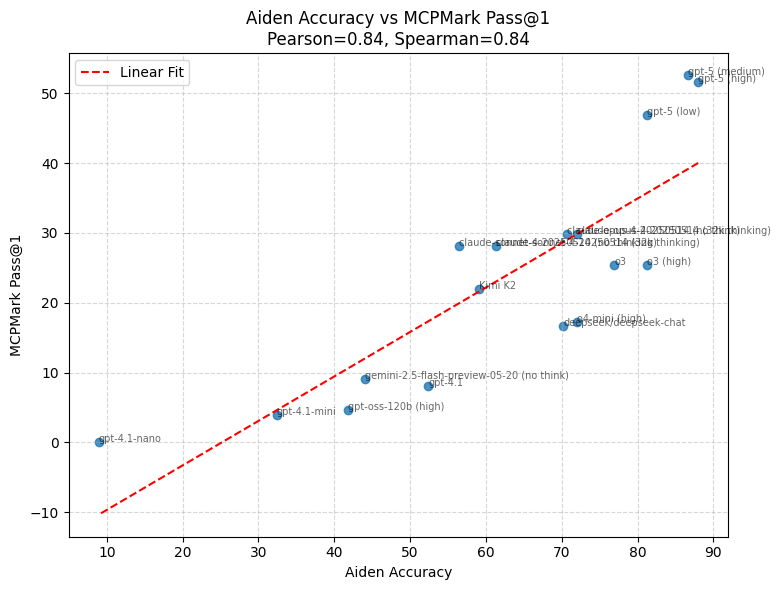

In [33]:
#!/usr/bin/env python3
"""
Correlate Aiden Accuracy with MCPMark Pass@1.
Step 1: Try direct Model → Model mapping.
Step 2: For ambiguous models, fall back to MCP Version inference.
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

# === Direct Aiden Model → MCP Model matches ===
aiden2mcp_model = {
    "gpt-5 (high)": "gpt-5-high",
    "gpt-5 (medium)": "gpt-5-medium",
    "gpt-5 (low)": "gpt-5-low",
    # "o3 (high)": "o3",
    "o3": "o3",
    "o4-mini (high)": "o4-mini",
    "deepseek/deepseek-chat": "deepseek-chat",
    "claude-opus-4-20250514 (no think)": "claude-opus-4-1",
    "claude-sonnet-4-20250514 (no thinking)": "claude-sonnet-4",
    "Kimi K2": "kimi-k2-0905",
    "Grok 4 (high)": "grok-4",
    "gpt-4.1": "gpt-4-1",
    "gpt-4.1-mini": "gpt-4-1-mini",
    "gpt-4.1-nano": "gpt-4-1-nano",
    "gpt-oss-120b (high)": "gpt-oss-120b",
    "gemini-2.5-flash-preview-05-20 (no think)": "gemini-2-5-flash",
    "glm-4-5": "glm-4-5",
}

# === Fallback: Aiden Model → MCP Version (for ambiguous cases) ===
aiden2mcp_version = {
    "gemini-2.5-pro-preview-06-05 (32k think)": "gemini-2.5-pro",
    "gemini-2.5-pro-preview-06-05 (default think)": "gemini-2.5-pro",
    "Gemini 2.5 Pro Preview 05-06": "gemini-2.5-pro",
    "Gemini 2.5 Pro Preview 03-25": "gemini-2.5-pro",
    # "DeepSeek R1 (0528)": "deepseek-v3.1-non-think",  # close
    "DeepSeek R1": "deepseek-v3.1-non-think",         # close
    # "DeepSeek V3 (0324)": "deepseek-v3.1-non-think",  # no direct match, approximate
    "claude-opus-4-20250514 (32k thinking)": "claude-opus-4-1",
    "claude-sonnet-4-20250514 (32k thinking)": "claude-sonnet-4",
}

# === Load data ===
aiden = pd.read_csv("cleaned_data/aiden.csv")    # Model,Accuracy
mcp = pd.read_csv("cleaned_data/mcpmark.csv")    # Model,Version,Pass@1

# Step 1: direct Model mapping
aiden["MCP_Model"] = aiden["Model"].map(aiden2mcp_model)

# Step 2: if missing, try Version mapping
def infer_from_version(aiden_model):
    return aiden2mcp_version.get(aiden_model, None)

aiden["MCP_Model"] = aiden.apply(
    lambda row: row["MCP_Model"] if pd.notnull(row["MCP_Model"]) else infer_from_version(row["Model"]),
    axis=1
)

# Merge
merged = aiden.merge(mcp, left_on="MCP_Model", right_on="Model", how="inner")

# Correlation
x = merged["Accuracy"].astype(float)
y = merged["Pass@1"].astype(float)

pearson_corr, p_p = pearsonr(x, y)
spearman_corr, p_s = spearmanr(x, y)

print("Pearson correlation:", pearson_corr, "p=", p_p)
print("Spearman correlation:", spearman_corr, "p=", p_s)

# === Plot ===
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.8)

for _, row in merged.iterrows():
    plt.text(row["Accuracy"], row["Pass@1"], row["Model_x"], fontsize=7, alpha=0.6)

plt.title(f"Aiden Accuracy vs MCPMark Pass@1\nPearson={pearson_corr:.2f}, Spearman={spearman_corr:.2f}")
plt.xlabel("Aiden Accuracy")
plt.ylabel("MCPMark Pass@1")
plt.grid(True, linestyle="--", alpha=0.5)

# Regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red", linestyle="--", label="Linear Fit")
plt.legend()

plt.tight_layout()
plt.show()
